In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
folder = 'results/sansLatentNetwork'

embedding_methods = [
    "CLIP_max_DINO_max",
    "CLIP_mean_DINO_mean",
    "CLIP_max_DINO_mean",
    "CLIP_mean_DINO_max",
    "CLIP_mean",
    "CLIP_max",
    "DINO_mean",
    "DINO_max"
]

list_of_users = [
    "Abivishaq",
    "Devleena",
    "Ethan",
    "Khalid",
    "Nadira",
    "Tofunmi2"
]

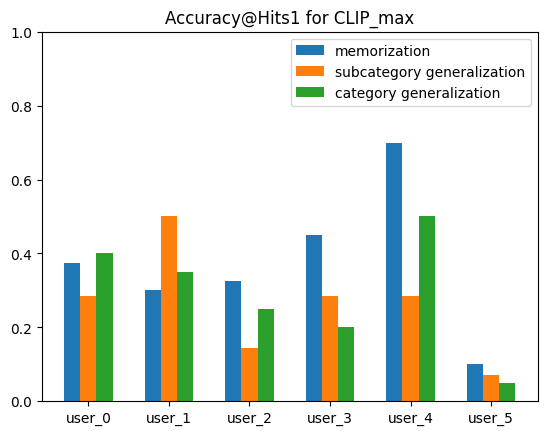

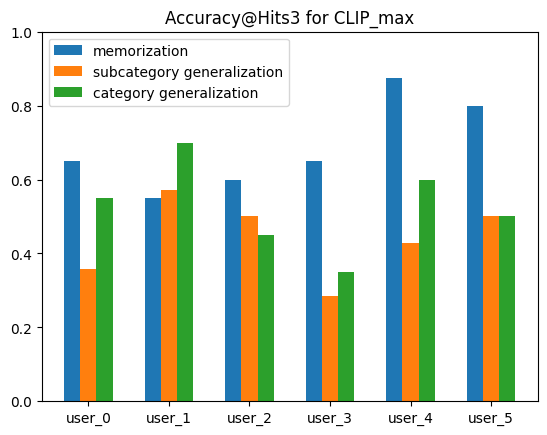

In [5]:
embb_type = "CLIP_max"

memorization_accuracy_hits1 = []
memorization_accuracy_hits3 = []

subcat_gen_accuracy_hits1 = []
subcat_gen_accuracy_hits3 = []

cat_gen_accuracy_hits1 = []
cat_gen_accuracy_hits3 = []

for user in list_of_users:
    file_path = os.path.join(
        "results/modelPerUser",
        f"results_{user}_{embb_type}.json",
    )

    with open(file_path, "r") as fjson:
        results = json.load(fjson)
        memorization_accuracy_hits1.append(results["train_memorization"]["accuracy@hits1"])
        memorization_accuracy_hits3.append(results["train_memorization"]["accuracy@hits3"])

        subcat_gen_accuracy_hits1.append(results["test_generalization_subcat"]["accuracy@hits1"])
        subcat_gen_accuracy_hits3.append(results["test_generalization_subcat"]["accuracy@hits3"])

        cat_gen_accuracy_hits1.append(results["test_generalization_cat"]["accuracy@hits1"])
        cat_gen_accuracy_hits3.append(results["test_generalization_cat"]["accuracy@hits3"])

linspace = np.arange(len(memorization_accuracy_hits1))

fig, ax = plt.subplots()
ax.set_title(f"Accuracy@Hits1 for {embb_type}")
ax.bar(linspace-0.2, memorization_accuracy_hits1, width=0.2, label="memorization")
ax.bar(linspace, subcat_gen_accuracy_hits1, width=0.2, label="subcategory generalization")
ax.bar(linspace+0.2, cat_gen_accuracy_hits1, width=0.2, label="category generalization")
ax.set_xticks(linspace, [f"user_{i}" for i in range(len(list_of_users))])
ax.set_ylim([0, 1])
ax.legend()

fig, ax = plt.subplots()
ax.set_title(f"Accuracy@Hits3 for {embb_type}")
ax.bar(linspace-0.2, memorization_accuracy_hits3, width=0.2, label="memorization")
ax.bar(linspace, subcat_gen_accuracy_hits3, width=0.2, label="subcategory generalization")
ax.bar(linspace+0.2, cat_gen_accuracy_hits3, width=0.2, label="category generalization")
ax.set_xticks(linspace, [f"user_{i}" for i in range(len(list_of_users))])
ax.set_ylim([0, 1])
ax.legend()


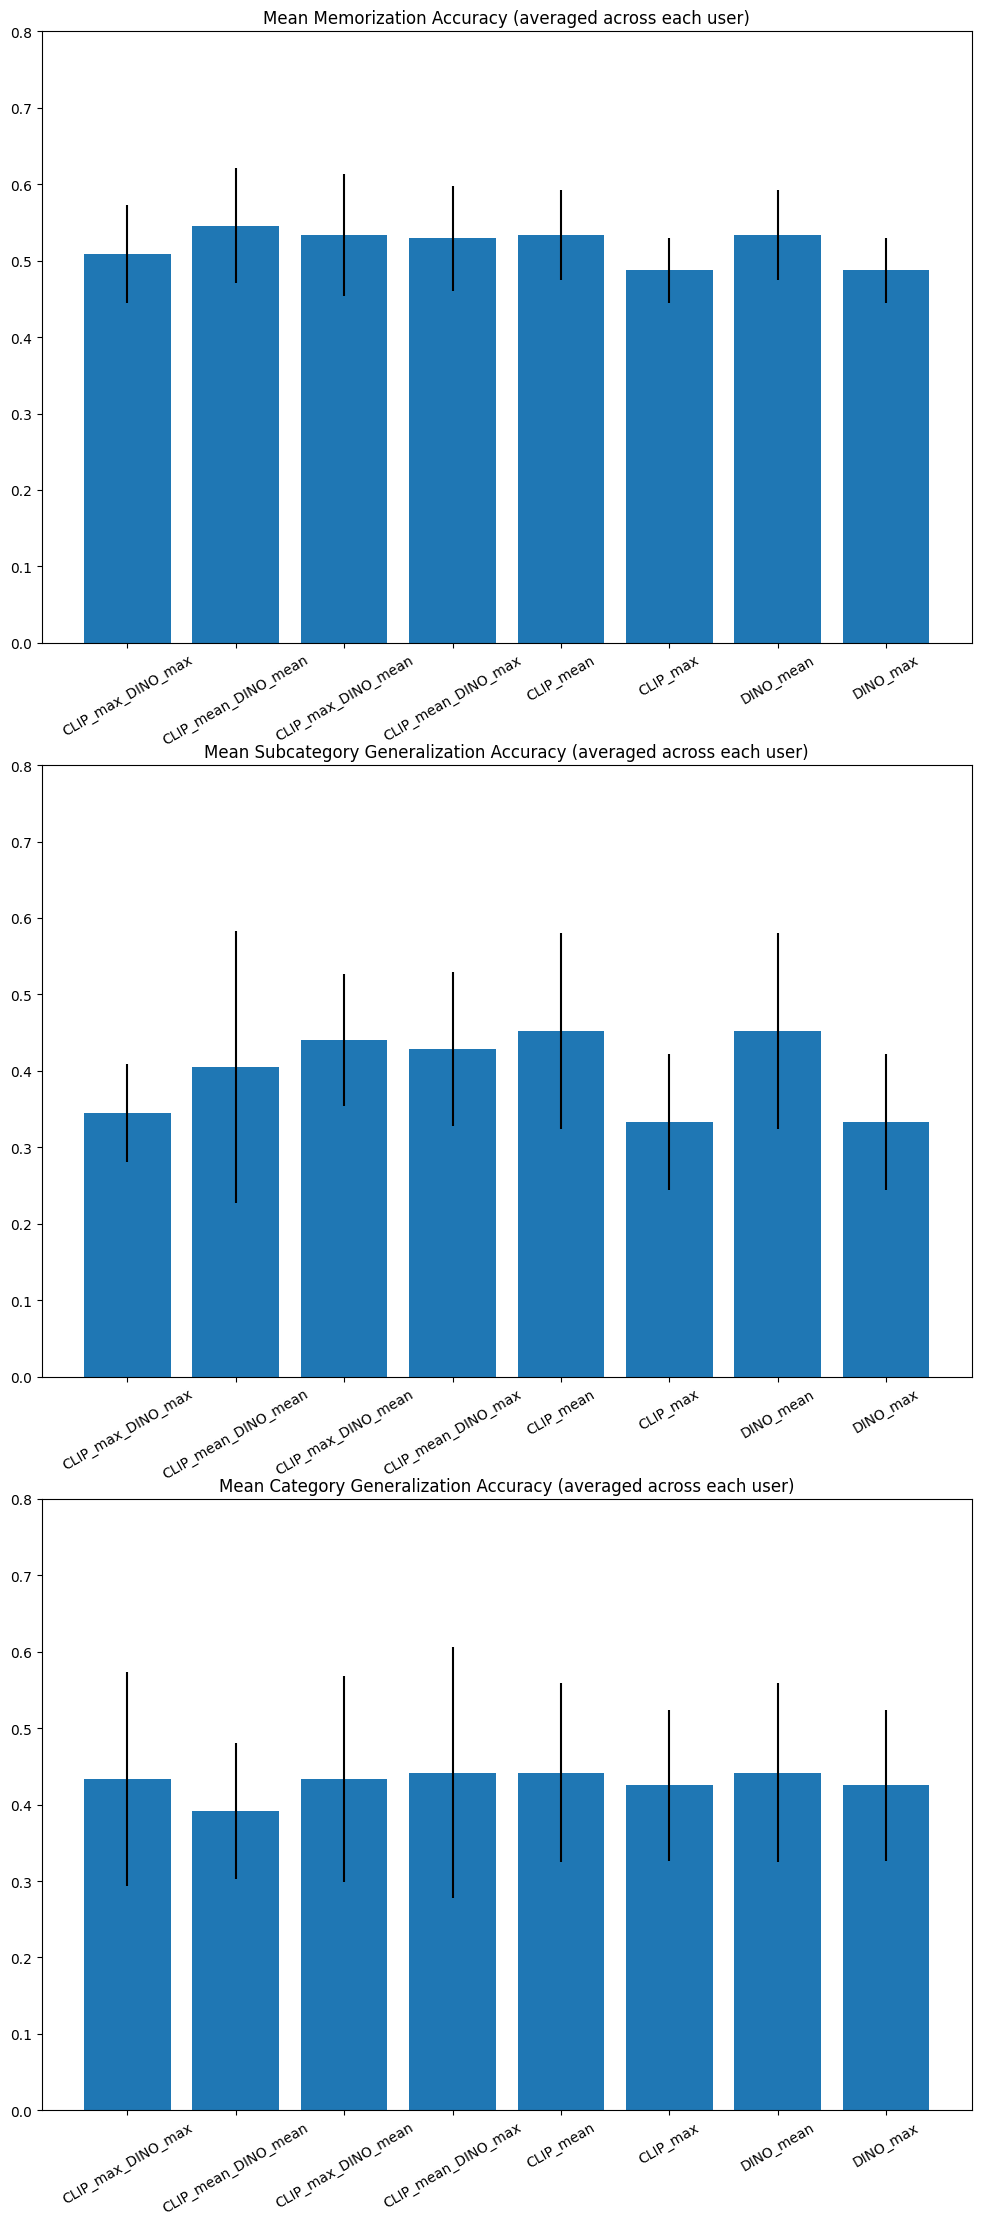

In [3]:
average_memorization_acc_array = []
std_memorization_acc_array = []
average_subcat_gen_acc_array = []
std_subcat_gen_acc_array = []
average_cat_gen_acc_array = []
std_cat_gen_acc_array = []

for embb_type in embedding_methods:
    memorization_acc_array = []
    subcat_gen_acc_array = []
    cat_gen_acc_array = []
    for user in list_of_users:
        file_path = os.path.join(
            folder,
            f"results_{user}_{embb_type}.json"
        )
        # print(file_path)
        with open(file_path, 'r') as fjson:
            results = json.load(fjson)
            memorization_acc_array.append(
                results["train_memorization"]["accuracy@hits1"]
            )
            subcat_gen_acc_array.append(
                results["test_generalization_subcat"]["accuracy@hits1"]
            )
            cat_gen_acc_array.append(
                results["test_generalization_cat"]["accuracy@hits1"]
            )
    average_memorization_acc_array.append(np.mean(memorization_acc_array))
    std_memorization_acc_array.append(np.std(memorization_acc_array))

    average_subcat_gen_acc_array.append(np.mean(subcat_gen_acc_array))
    std_subcat_gen_acc_array.append(np.std(subcat_gen_acc_array))

    average_cat_gen_acc_array.append(np.mean(cat_gen_acc_array))
    std_cat_gen_acc_array.append(np.std(cat_gen_acc_array))

fig, ax = plt.subplots(3, 1, figsize=(12, 27))
ax[0].bar(np.arange(len(embedding_methods)), average_memorization_acc_array, yerr=std_memorization_acc_array)
ax[0].set_ylim([0, 0.8])
ax[0].set_title("Mean Memorization Accuracy (averaged across each user)")
ax[1].bar(np.arange(len(embedding_methods)), average_subcat_gen_acc_array, yerr=std_subcat_gen_acc_array)
ax[1].set_ylim([0, 0.8])
ax[1].set_title("Mean Subcategory Generalization Accuracy (averaged across each user)")
ax[2].bar(np.arange(len(embedding_methods)), average_cat_gen_acc_array, yerr=std_cat_gen_acc_array)
ax[2].set_ylim([0, 0.8])
ax[2].set_title("Mean Category Generalization Accuracy (averaged across each user)")
for a in ax: a.set_xticks(np.arange(len(embedding_methods)), embedding_methods, rotation=30)
plt.show()

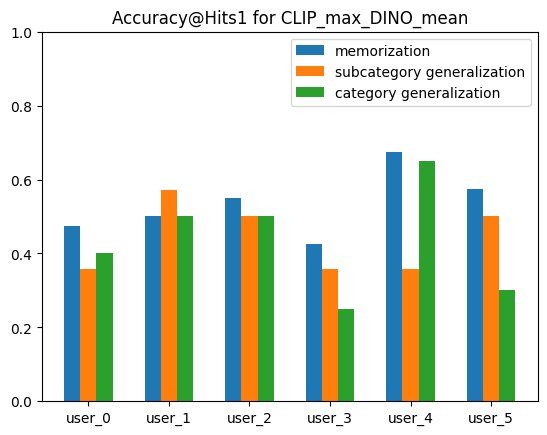

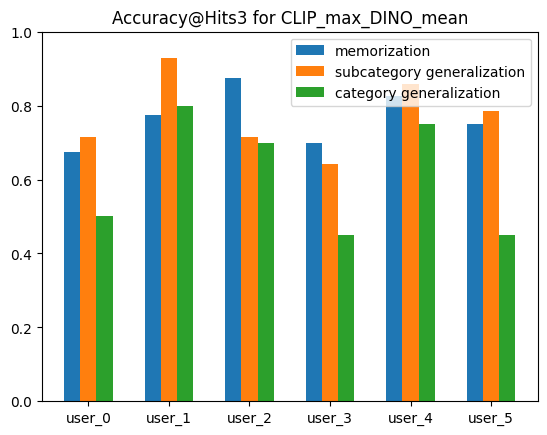

In [4]:
embb_type = "CLIP_max_DINO_mean"

memorization_accuracy_hits1 = []
memorization_accuracy_hits3 = []
subcat_gen_accuracy_hits1 = []
subcat_gen_accuracy_hits3 = []
cat_gen_accuracy_hits1 = []
cat_gen_accuracy_hits3 = []

for u in list_of_users:
    file_path = os.path.join(
        folder,
        f"results_{u}_{embb_type}.json"
    )

    with open(file_path, 'r') as fjson:
        results = json.load(fjson)
        memorization_accuracy_hits1.append(results["train_memorization"]["accuracy@hits1"])
        memorization_accuracy_hits3.append(results["train_memorization"]["accuracy@hits3"])

        subcat_gen_accuracy_hits1.append(results["test_generalization_subcat"]["accuracy@hits1"])
        subcat_gen_accuracy_hits3.append(results["test_generalization_subcat"]["accuracy@hits3"])

        cat_gen_accuracy_hits1.append(results["test_generalization_cat"]["accuracy@hits1"])
        cat_gen_accuracy_hits3.append(results["test_generalization_cat"]["accuracy@hits3"])

linspace = np.arange(len(memorization_accuracy_hits1))

fig, ax = plt.subplots()
ax.set_title(f"Accuracy@Hits1 for {embb_type}")
ax.bar(linspace-0.2, memorization_accuracy_hits1, width=0.2, label="memorization")
ax.bar(linspace, subcat_gen_accuracy_hits1, width=0.2, label="subcategory generalization")
ax.bar(linspace+0.2, cat_gen_accuracy_hits1, width=0.2, label="category generalization")
ax.set_xticks(linspace, [f"user_{i}" for i in range(len(list_of_users))])
ax.set_ylim([0, 1])
ax.legend()

fig, ax = plt.subplots()
ax.set_title(f"Accuracy@Hits3 for {embb_type}")
ax.bar(linspace-0.2, memorization_accuracy_hits3, width=0.2, label="memorization")
ax.bar(linspace, subcat_gen_accuracy_hits3, width=0.2, label="subcategory generalization")
ax.bar(linspace+0.2, cat_gen_accuracy_hits3, width=0.2, label="category generalization")
ax.set_xticks(linspace, [f"user_{i}" for i in range(len(list_of_users))])
ax.set_ylim([0, 1])
ax.legend()